# Assignment 3 - Supervised Learning

## *Xuan Yu*
Netid:  *xy93*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

(a) 
Calculate the Likelihood function:

$h(x_{i}) = \sigma(\mathbf{w}^T \mathbf{x}_i) = \prod_{i = 1}^{N} (\hat y_{i})^{y_{i}} [1 - \hat y_{i}]^{1-y_{i}}$

(b) Calculate the cost Function:

$\mathbf{C}(w) = - \frac{1}{N} \sum_{i = 1}^{N} \big[ y_{i} log(\hat y_{i}) + (1 - y_{i})log(1-\hat y_{i}) \big]$

where $\hat y_{i} = \sigma(\mathbf{w}^T \mathbf{x}_{i})$

(c) Calculate the gradient:

$\frac{\partial C}{\partial w} = -\frac{1}{N}\sum_{i = 1}^{N} \big[ \frac{y_{i}}{\hat y_{i}}\frac{\partial \hat y_{i}}{\partial w} - \frac{1-y_{i}}{1 - \hat y_{i}}\frac{\partial \hat y_{i}}{\partial w}\big]$

where $\frac{\partial \hat y_{i}}{\partial w} = \hat y_{i} (1 - \hat y_{i})x_{i}$

So $\frac{\partial C}{\partial w} = -\frac{1}{N}\sum_{i = 1}^{N} \big[ \frac{y_{i}}{\hat y_{i}}\frac{\partial \hat y_{i}}{\partial w} - \frac{1-y_{i}}{1 - \hat y_{i}}\frac{\partial \hat y_{i}}{\partial w}\big] = \frac{1}{N}\sum_{i = 1}^{N} \big[ (\hat y_{i} - y_{i}) x_{i} \big]$

(d) The gradient descent update equation:

$\mathbf{w} = \mathbf{w} - \eta \frac{1}{N}\sum_{i = 1}^{N} \big[ (\hat y_{i} - y_{i}) x_{i} \big]$


(e)


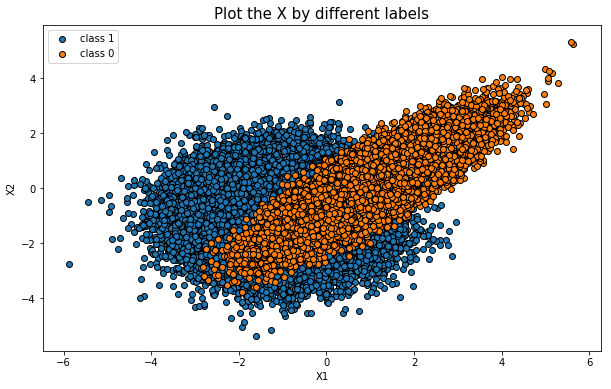

1. The data doesn't appear to be separable because of the overlapping area around (0, 0), and the scaling is different. 
2. The logistic regression may be a good choice for these data because this dataset has just two class with binary Response.


In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# e
print("(e)")
train = pd.read_csv('../others/assignments/data/A3_Q1_data.csv')
# initialize the data      
X = np.array(list(zip(*[train.x1,train.x2])))
y = np.array(train.y)
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = "class 1", edgecolors="black")
plt.scatter(X[y == 0, 0], X[y == 0, 1], label = "class 0", edgecolors="black")
plt.xlabel("X1", fontsize=10)
plt.ylabel("X2", fontsize=10)
plt.title("Plot the X by different labels", fontsize=15)
plt.legend()
plt.show()
print("1. The data doesn't appear to be separable because of the overlapping area around (0, 0), " 
      "and the scaling is different. ")
print("2. The logistic regression may be a good choice for these data because "
      "this dataset has just two class with binary Response.")

In [213]:
#f
print("(f)")
print("Number of missing values:")
print(train.isnull().sum())
train.describe()

(f)
Number of missing values:
x1    0
x2    0
y     0
dtype: int64


,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


In [230]:
print("We first look at the data:")
print("1. The mean of x1 is 0.048, while the mean of x2 is about -0.40, "
      "so the scale is different between x1 and x2.")
      
print("2. We don't have missing values to deal with.")
      
print("3. To handle different scale between x1 and x2, we need to normalize them "
      "into the same scale. We'll do it later with adding the intercept.")


We first look at the data:
1. The mean of x1 is 0.048, while the mean of x2 is about -0.40, so the scale is different between x1 and x2.
2. We don't have missing values to deal with.
3. To handle different scale between x1 and x2, we need to normalize them into the same scale. We'll do it later with adding the intercept.


In [231]:
# g, h, i
class SelfLR():
    def __init__(self):
        # Initialize the weight matrix
        self.W = None
    
    def sigmoid(self,z):
        # The sigmoid function
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X):
        # Return the yHat
        if self.W is not None: return self.sigmoid(X.dot(self.W))
        else: print("You must first fit the data before you use predict function.")
    
    def costFunc(self,X,y):
        # The cost function equation
        N = len(y)
        yHat = self.predict(X)
        cost = -y.T.dot(np.log(yHat))-(1-y).T.dot(np.log(1-yHat))
        return cost / N
    
    def gradient(self,X,y):  
        # Calculate the gradient
        N = len(y)
        yHat = self.predict(X)
        gradient = -(1/N) * X.T.dot(yHat - y)
        return gradient
    
    def fitData(self, epochs, lr, X_train, y_train, X_test, y_test):
        # fit the model
        train_cost_lst = []
        test_cost_lst = []
        self.W = np.random.rand(X_train.shape[1])
        for i in range(epochs):
            # apply the cost function to train data and test data
            cost_train = self.costFunc(X_train,y_train)
            cost_test = self.costFunc(X_test,y_test)
            # record current Weight to compare with Weight after 
            # doing the gradient descent 
            currentW = self.W
            # gradient descent
            gradient = self.gradient(X_train,y_train)
            self.W += np.multiply(gradient, lr)
            train_cost_lst.append(cost_train)
            test_cost_lst.append(cost_test)
            # check if the cost function changes is smaller than 10^-6
            if np.linalg.norm(self.W, ord=2) - np.linalg.norm(currentW, ord=2) < 10^-6:
                break
        return train_cost_lst,test_cost_lst

In [232]:
# j
# split the data into train and test set
np.random.shuffle(np.arange(len(y)))
X_train_original = X[:70000]
y_train_original = y[:70000]
X_test_original = X[70000:]
y_test_original = y[70000:]

In [233]:
# Scaling and adding intercept
def scaleAndAddIntercept(X):
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    return np.concatenate((np.ones((len(X), 1)), X), axis=1)

In [239]:
# scaling X_train and X_test
X_train = scaleAndAddIntercept(X_train_original)
X_test = scaleAndAddIntercept(X_test_original)
y_train = y_train_original
y_test = y_test_original

In [247]:
logisticRegression = SelfLR()
epoch, lr = 500, 0.1
train_costs, test_costs = logisticRegression.fitData(epoch, lr, 
                                                     X_train, y_train, 
                                                     X_test, y_test)

(j)


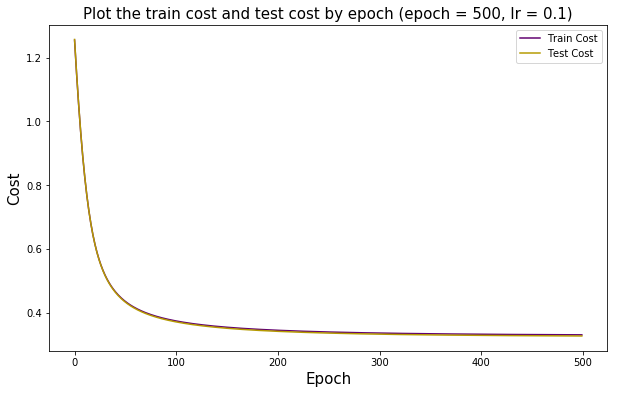

In [248]:
print("(j)")
plt.figure(figsize=(10, 6))
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Cost", fontsize=15)
plt.title("Plot the train cost and test cost by epoch (epoch = {}, lr = {})"
          .format(epoch, lr), fontsize=15)
line1, = plt.plot(range(epoch), train_costs, label = "Train Cost", color='#610070')
line2, = plt.plot(range(epoch), test_costs, label = "Test Cost", color='#b59a01')
plt.legend(handles=[line1, line2], loc = 'upper right')
plt.show()

(k)


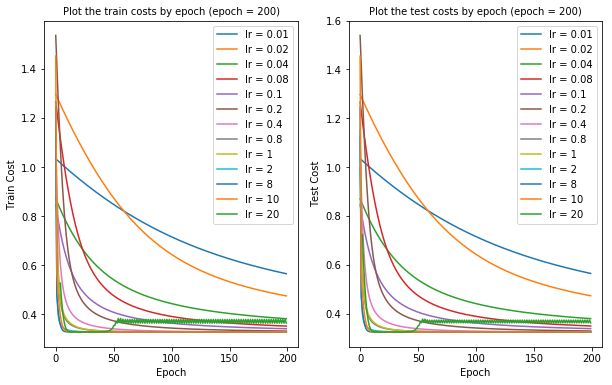

1. I notice that when the learning rate is small, the costs reduce slowly by epoch. The larger the learning rate is, the faster the reduction is when epoch changes. However, in our plot, when the learning rate is 20, the cost starts to bouncing around after epoch 50 and it doesn't goes down like other costs
2. I use 2 as my learning rate because when leanring rate equals 5, its reducing rate is fast and the learning rate is also not extremely large that leads to bouncing after some epochs.


In [252]:
# k
print("(k)")
# from mpl_toolkits.axes_grid1 import Grid
# fig = plt.figure(figsize=(10, 6))
# grid = Grid(fig, rect=111, nrows_ncols=(1,2), axes_pad=0.25, label_mode='all')
_, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(10, 6))
epoch = 200
for lr in [0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4, 0.8, 1, 2, 8, 10, 20]:
    logisticRegression = SelfLR()
    train_costs, test_costs = logisticRegression.fitData(epoch, lr, 
                                                         X_train, y_train,
                                                         X_test, y_test)
    ax_train.plot(range(epoch), train_costs, label = "lr = {}".format(lr))
    ax_train.set_title("Plot the train costs by epoch (epoch = {})"
                       .format(epoch), fontsize=10)
    ax_train.set_xlabel("Epoch")
    ax_train.set_ylabel("Train Cost")
    ax_test.plot(range(epoch), test_costs, label = "lr = {}"
                 .format(lr))
    ax_test.set_title("Plot the test costs by epoch (epoch = {})"
                      .format(epoch), fontsize=10)
    ax_test.set_xlabel("Epoch")
    ax_test.set_ylabel("Test Cost")
ax_train.legend(loc = 'upper right')
ax_test.legend(loc = 'upper right')
plt.show()

print("1. I notice that when the learning rate is small, the costs reduce "
      "slowly by epoch. The larger the learning rate is, the faster the "
      "reduction is when epoch changes. However, in our plot, when the "
      "learning rate is 20, the cost starts to bouncing around after epoch 50 "
      "and it doesn't goes down like other costs")

print("2. I use 2 as my learning rate because when leanring rate equals 5, "
      "its reducing rate is fast and the learning rate is also not extremely "
      "large that leads to bouncing after some epochs.")

In [259]:
# i
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

def cross_validation(epochs, lr, training_fold, X, y):
    #calculate the K folds' models
    labels, yHats = [], []
    skf = StratifiedKFold(n_splits=training_fold)
    for train_index, test_index in skf.split(X, y):
        # preprocessing
        X_train, X_test = X[train_index], X[test_index]
        X_train = scaleAndAddIntercept(X_train)
        X_test = scaleAndAddIntercept(X_test)
        y_train, y_test = y[train_index], y[test_index]
        # get costs and append
        logisticRegression = SelfLR()
        train_costs, test_costs = logisticRegression.fitData(epoch, lr, 
                                                             X_train, y_train, 
                                                             X_test, y_test)
        labels.extend(y_test)
        yHats.extend(logisticRegression.predict(X_test))
        
    return labels, yHats

In [260]:
# Plot ROC function
def plot_roc(labels, pred_scores, training_fold):
    plt.figure(figsize=(10, 6))
    # calculate AUC and plot ROC
    fpr, tpr, _ = roc_curve(labels, pred_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, pred_scores)
    plt.plot(fpr,tpr,label = "AUC = {:0.3f}".format(auc))
    plt.title("The ROC Curve for the Logistic Regression Model with AUC ")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

(l)


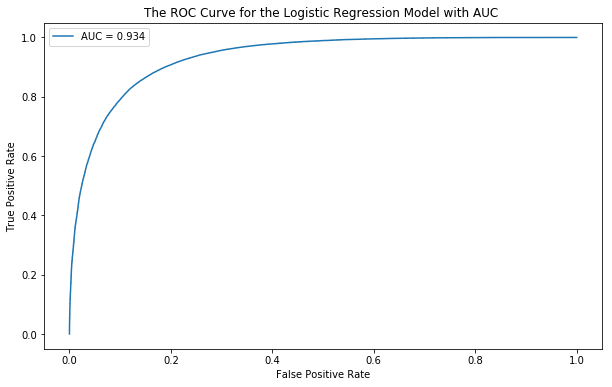

In [261]:
print("(l)")
epoch, lr, training_fold = 500, 2, 10
labels, yHats = cross_validation(epoch, lr, training_fold, X, y)
plot_roc(labels, yHats, training_fold)
plt.show()

In [256]:
# m
print("(m)")
print("We use cross validation to avoid cheating from the model seeing the test "
      "set before we do the test procee, thus trying to avoid overfitting. "
      "We split the training data into different train set and validation set "
      "in different fold, and generate more accurate result.")

(m)
We use cross validation to avoid cheating from the model seeing the test set before we do the test procee, thus trying to avoid overfitting. We split the training data into different train set and validation set in different fold, and generate more accurate result.


In [262]:
# n
def plotGrid(f, ax_plot, X, y, title):
    # create meshgrid for plotting.
    xx, yy = np.mgrid[-5:5:0.01, -5:5:0.01]
    ones_grid = np.ones_like(xx).reshape(-1,1)
    base_grid = np.c_[ones_grid.ravel().reshape(-1,1), 
                      xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)]
    # calculate the probability using the logistic regression model we generated before.
    prob_grid = logisticRegression.predict(base_grid).reshape(xx.shape[0],xx.shape[1])
    cont = ax_plot.contourf(xx, yy, prob_grid, 25, cmap = "Spectral", vmin=0, vmax=1)    
    ax_plot.scatter(X[:,0], X[:,1], c=y, s=50, 
                    cmap = "Spectral", edgecolor="white", linewidth=1)
    ax_plot.set_title("The scatter plot of {} and the decision boundary generated by the classifier"
                      .format(title))
    ax_plot.set(aspect="equal", xlim=(-5, 5), ylim=(-5, 5), 
                xlabel="X1 (the first parameter)", ylabel="X2 (the second parameter)")
    ax_bar = f.colorbar(cont)
    ax_bar.set_ticks([0.0, 0.25, 0.5, 0.75, 1.0])
    ax_bar.set_label("Probability that the point is in group 1")

(n)


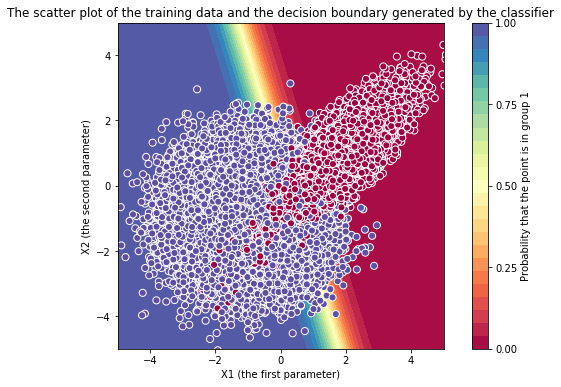

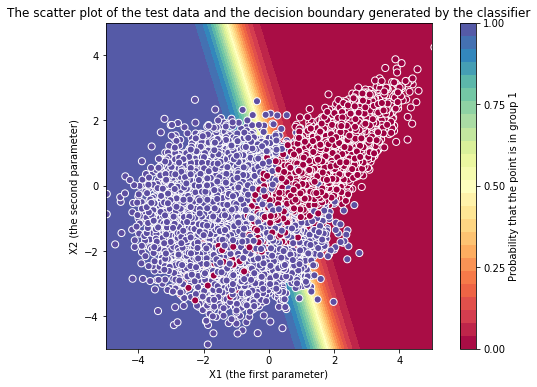

In [263]:
print("(n)")
# call the plotGrid function to get the plot for the training and test data.
f1, ax1 = plt.subplots(figsize=(10, 6))
plotGrid(f1, ax1, X_train_original, y_train_original, "the training data")
plt.show()
f2, ax2 = plt.subplots(figsize=(10, 6))
plotGrid(f2, ax2, X_test_original, y_test_original, "the test data")
plt.show()

(n)


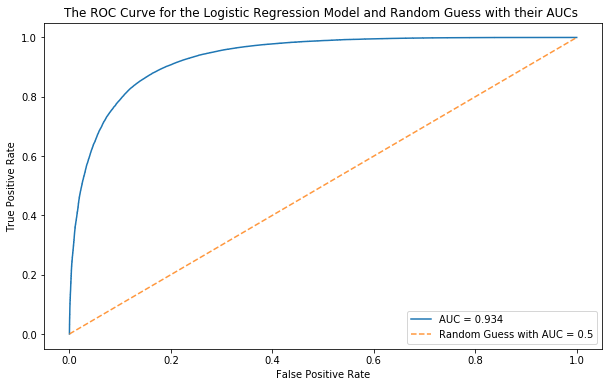

My model with cross validation has a 0.933 AUC, while the random chace model has an AUC of 0.5. So my model performs really great and way better than the random chance model.


In [264]:
# o
print("(n)")
# Plot one ROC function
plot_roc(labels, yHats, training_fold)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess with AUC = 0.5', alpha=.8)
plt.title("The ROC Curve for the Logistic Regression Model and Random Guess with their AUCs ")
plt.legend()
plt.show()
print("My model with cross validation has a 0.933 AUC, while the "
      "random chace model has an AUC of 0.5. So my model performs "
      "really great and way better than the random chance model." )


## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [268]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from keras.datasets import mnist

# a
print("(a)")
# import data
(X_train, labels_train), (X_test, labels_test) = mnist.load_data()
y_train = np.zeros((len(labels_train),1))
y_test = np.zeros((len(labels_test),1))
y_train[np.where(labels_train == 3)] = 1
y_test[np.where(labels_test == 3)] = 1

(a)


(b)


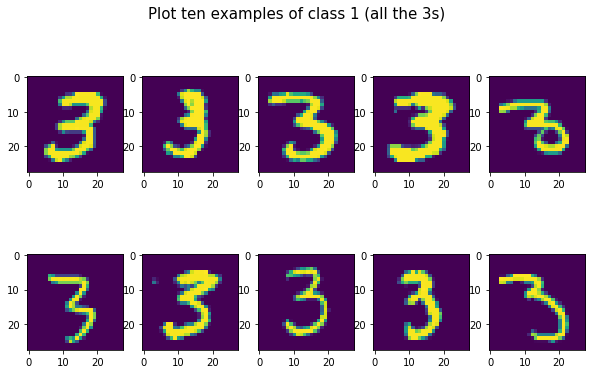

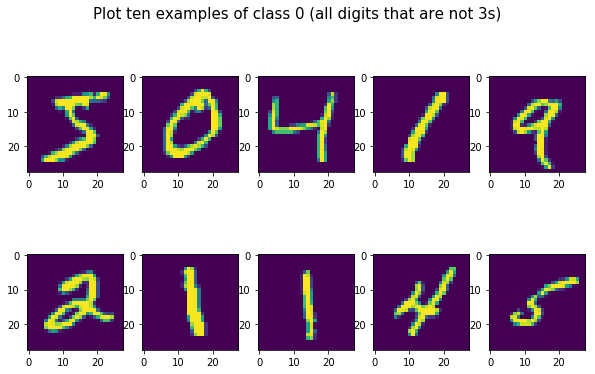

In [269]:
# b
print("(b)")
pos_i = np.where(y_train==1)[0][:10]
neg_i = np.where(y_train==0)[0][:10]
plt.figure(figsize=(10, 6))
for i, ind in enumerate(pos_i):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[ind])
plt.suptitle('Plot ten examples of class 1 (all the 3s)', fontsize = 15)
plt.figure(figsize=(10, 6))
for i, ind in enumerate(neg_i):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[ind])
plt.suptitle('Plot ten examples of class 0 (all digits that are not 3s)'
             , fontsize = 15)
plt.show()

In [270]:
print("(c)")
print("The dataset are not balanced, because we split the dataset by '3' "
      "and 'others', which means the number of 'others' might be 9 times "
      "greater than the '3's. This may lead to the problem that we don't "
      "have enough sample to train the model.")

(c)
The dataset are not balanced, because we split the dataset by '3' and 'others', which means the number of 'others' might be 9 times greater than the '3's. This may lead to the problem that we don't have enough sample to train the model.


In [271]:
def cross_validation_q2(k,X,y,model):
    prediction_scores = np.empty(y.shape[0],dtype='object')
    kfold = StratifiedKFold(n_splits=k, shuffle=True)
    for train_i, val_i in kfold.split(X, y):
        # Extract the training and validation data for this fold
        X_train, X_val = X[train_i], X[val_i]
        y_train = y[train_i]
        # Train the classifier
        model = model.fit(X_train,y_train)
        # Test the classifier on the validation data for this fold
        cpred = model.predict_proba(X_val)
        # Save the predictions for this fold
        prediction_scores[val_i] = cpred[:,1]
    return prediction_scores

In [281]:
def plot_roc_q2(labels, pred_scores, ax = None):
    # calculate AUC and plot ROC
    fpr, tpr, _ = roc_curve(labels, pred_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, pred_scores)
    if ax:
        ax.plot(fpr,tpr,label = "AUC = {:0.3f}".format(auc))
        ax.legend()
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
    else: 
        plt.plot(fpr,tpr,label = "AUC = {:0.3f}".format(auc))
        plt.title("The ROC Curve for the Logistic Regression Model with AUC ")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

In [273]:
# flatten the array
X_train = np.array([X_train[i].flatten() for i in range(len(y_train))])
X_test = np.array([X_test[i].flatten() for i in range(len(y_test))])

In [274]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(d)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

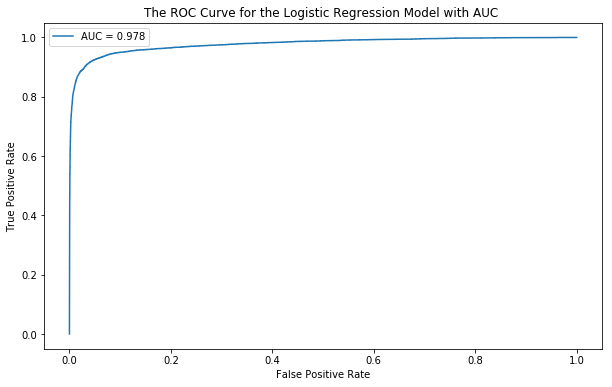

In [275]:
print("(d)")
training_fold = 5
scores = cross_validation_q2(training_fold, X_train, y_train, lreg)
plt.figure(figsize=(10, 6))
plot_roc_q2(y_train, scores)
plt.show()

In [282]:
# d
# the Precision-Recall curve plotting function for the classifiers
from sklearn.metrics import precision_recall_curve
def plot_recall_q2(labels, pred_scores, ax = None):
    precision, recall, _ = precision_recall_curve(labels, pred_scores)
    if ax:
        ax.plot(recall, precision)
        ax.set_xlabel("Recall")
        ax.set_ylabel("Precision")
    else: 
        # calculate AUC and plot ROC
        plt.plot(recall, precision)
        plt.xlabel("Recall")
        plt.ylabel("Precision")

In [290]:
# Initialize the two yHat
y_hat_all_rand = np.random.randint(2, size=len(y_test))
y_hat_all_zero = np.zeros((len(y_test),1))

(d)


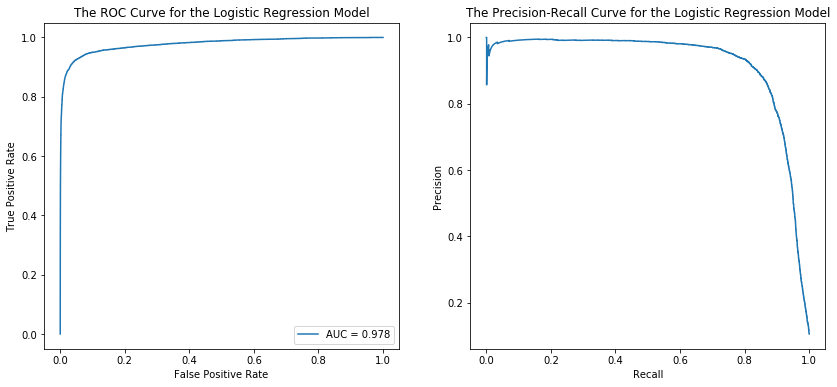

In [291]:
print("(d)")
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# plot the ROC for the normal classifier.
plot_roc_q2(y_train, scores, ax1)
ax1.set_title("The ROC Curve for the Logistic Regression Model")
plot_recall_q2(y_train, scores, ax2)
ax2.set_title("The Precision-Recall Curve for the Logistic Regression Model")
plt.show()

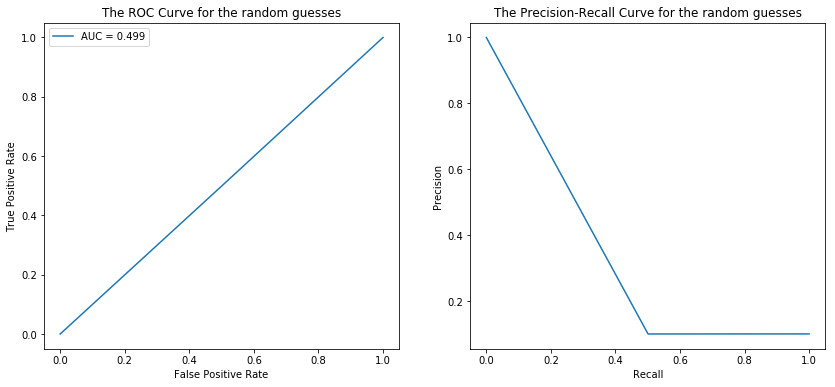

In [292]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# plot the ROC for the classifier that are all random.
plot_roc_q2(y_test, y_hat_all_rand, ax1)
ax1.set_title("The ROC Curve for the random guesses")
plot_recall_q2(y_test, y_hat_all_rand, ax2)
ax2.set_title("The Precision-Recall Curve for the random guesses")
plt.show()

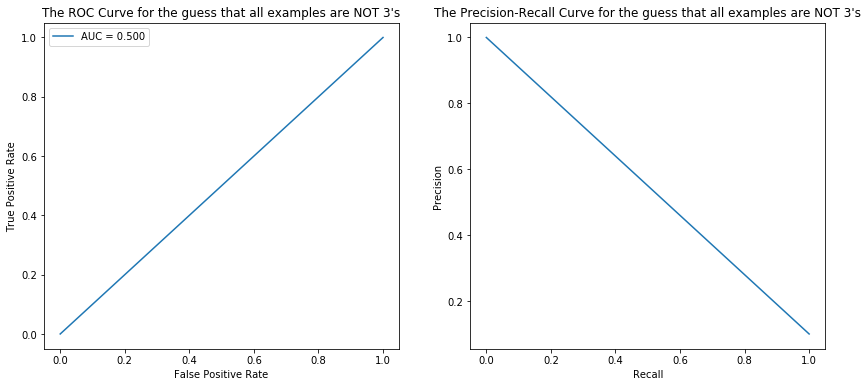

In [293]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# plot the ROC for the classifier that guesses that all examples are NOT 3's.
plot_roc_q2(y_test, y_hat_all_zero, ax1)
ax1.set_title("The ROC Curve for the guess that all examples are NOT 3's")
plot_recall_q2(y_test, y_hat_all_zero, ax2)
ax2.set_title("The Precision-Recall Curve for the guess that all examples are NOT 3's")
plt.show()

In [294]:
print("In the ROC plots, the logistic regression model's AUC is way larger than the AUC "
      "of other two models, and its ROC curve is also better. So the logistic regression model "
      "really outperforms the other two models. In the Precision-Recall plots, the area under the PR curve "
      "of the logistic regression model is larger than the area of the other two, so the Precision-Recall plots "
      "also shows that the logistic regression models really outperforms the other two models.")   

In the ROC plots, the logistic regression model's AUC is way larger than the AUC of other two models, and its ROC curve is also better. So the logistic regression model really outperforms the other two models. In the Precision-Recall plots, the area under the PR curve of the logistic regression model is larger than the area of the other two, so the Precision-Recall plots also shows that the logistic regression models really outperforms the other two models.


In [295]:
# f
# generate a list of coefficients(the x axis)
Coef = np.linspace(0.01, 10, num=20)
# generate lists for all estimates(the y axis)
costs, aucs, f1_scores, noneZeroParams = [],[],[],[]  

In [296]:
# cost function
def cost(y,yHat):
    N = len(y)
    cost = -y.T.dot(np.log(yHat))-(1-y).T.dot(np.log(1-yHat))
    return cost / N

# function to calculate all the estimates we need
def calCostAucF1Para(X_lass_test, y_lass_test, model, costs, aucs, f1_scores, noneZeroParams):
    # pass in the array of each estimates to store the value
    scores_lass = model.predict_proba(X_lass_test)
    yhat_lass = model.predict(X_lass_test) 
    fpr, tpr, _  = roc_curve(y_lass_test,scores_lass[:,1], pos_label=1)
    costs.append(float(cost(y_lass_test,scores_lass[:,1])))
    aucs.append(float(metrics.auc(fpr,tpr)))
    f1_scores.append(metrics.f1_score(y_lass_test, yhat_lass,average='micro'))
    noneZeroParams.append(np.count_nonzero(model.coef_))

# function to plot all the estimates we need
def plotRegCoefAndEstimates(Coef, estimates, title):
    plt.figure(figsize=(10,6))
    plt.plot(Coef,estimates)
    plt.title("The change in {} when Regularization Coefficient changes".format(title))
    plt.xlabel("Regularization Coefficient C")
    plt.ylabel(title)
    plt.show()  

In [297]:
# build the model and calculate the estimates
for i in range(len(Coef)):
    # l1 penalty
    regular_lr = LogisticRegression(penalty='l1',C=Coef[i],solver='liblinear',multi_class='ovr')
    regular_lr.fit(X_train, y_train)
    calCostAucF1Para(X_test, y_test, regular_lr, costs, aucs, f1_scores, noneZeroParams)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

(f)


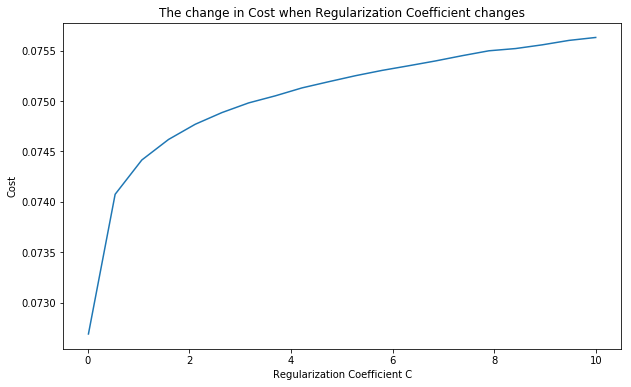

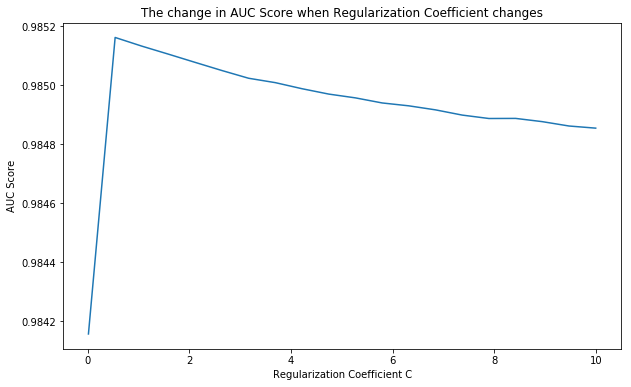

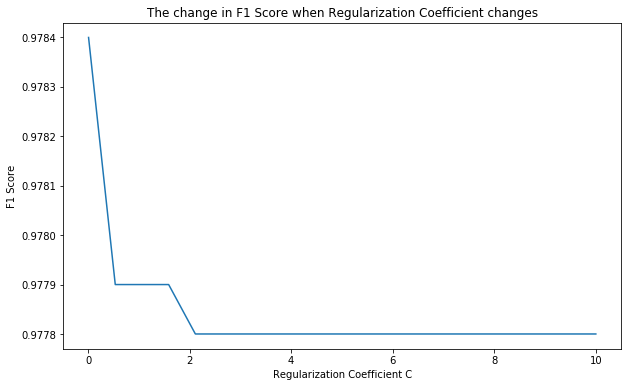

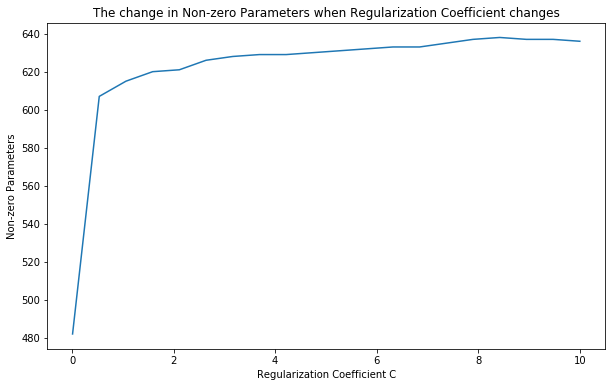

In [298]:
# make plots of the estimates
print("(f)")
plotRegCoefAndEstimates(Coef, costs, "Cost")
plotRegCoefAndEstimates(Coef, aucs, "AUC Score")
plotRegCoefAndEstimates(Coef, f1_scores, "F1 Score")
plotRegCoefAndEstimates(Coef, noneZeroParams, "Non-zero Parameters")

In [299]:
print("Observations:")
print("When the C increases, the F1-scores goes down, while the costs and "
      "the non-zero parameter goes up; the AUCs first goes up then down.")
print("Analyzations:")
print("1. The stonger regularization gives the model really high bias and low variance, "
     "so the model could easily be underfitting, result in low AUC, low F1-score and "
      "high cost in the left part of the plots. The reason why the Non-zero parameter "
      "increases when C increases is because with weaker regularization in the right part "
      "more and more parameter will be introduced.")
print("2. The stonger regularization also gives us good things: the low variance, which"
     "makes the model less likely to overfit. The AUC's first going up and then down shows"
      "the bias-variance trade off: from high bias-low variance to low bias-high variance.")

Observations:
When the C increases, the F1-scores goes down, while the costs and the non-zero parameter goes up; the AUCs first goes up then down.
Analyzations:
1. The stonger regularization gives the model really high bias and low variance, so the model could easily be underfitting, result in low AUC, low F1-score and high cost in the left part of the plots. The reason why the Non-zero parameter increases when C increases is because with weaker regularization in the right part more and more parameter will be introduced.
2. The stonger regularization also gives us good things: the low variance, whichmakes the model less likely to overfit. The AUC's first going up and then down showsthe bias-variance trade off: from high bias-low variance to low bias-high variance.


## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

(a)

Description:

I get this dataset from MNIST. MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. 

For this dataset, my goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

Interest:

This dataset is interesting, but in question 2 we only used logistic regression to handle the class "is 3" and "others" with binary outcome, which is a downside for logistic regression. However, if we want to further explore the dataset with all digits from 0-9, we need to further develop other machine learning models to solve this problem. We also cannot use ROC curves, which is designed for binary classification problems. We need to build confusion matrix to further help us with the performance evaluation. The exploration will always be hard but excited!

In [1]:
print("(b)")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns

train = pd.read_csv("../digit_recoginzer/train.csv")
test = pd.read_csv("../digit_recoginzer/train.csv")
print("The total number of null value in this dataset is: {}".format(np.sum(train.isna().sum())))


(b)
The total number of null value in this dataset is: 0


We first take a look at the data.

In [2]:
train_X = train.iloc[:,1:]   # get the params
train_y = train.iloc[:,0] # get the labels
train_X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
train_y.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

We don't find any significant problem about the data.

In [4]:
train_y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

It seems that we have similar counts for all 10 digits, so we don't need to worry about taking care of unbalanced dataset and data spliting in the cross validation process.

In [5]:
# change to np array
train_X = np.array(train_X)
train_y = np.array(train_y)

We plot 6 instances for each digit to look at them.

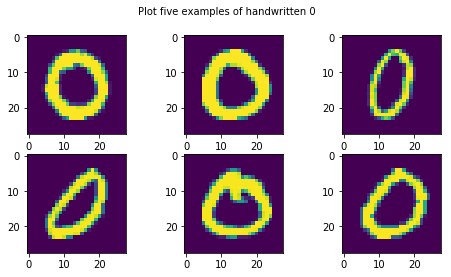

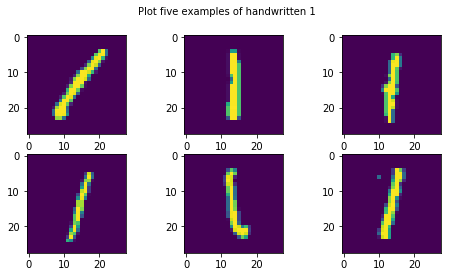

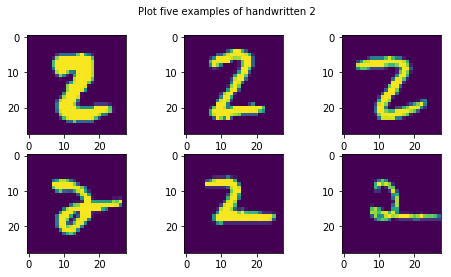

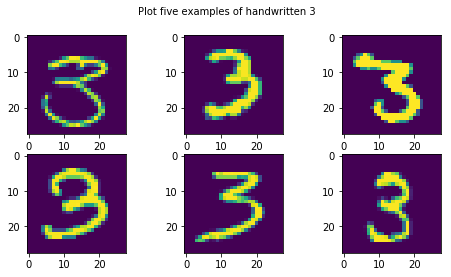

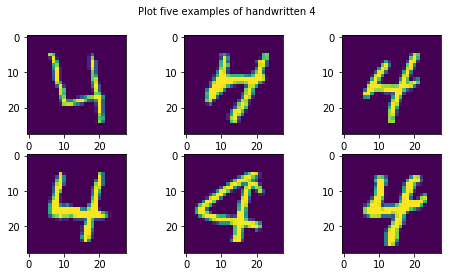

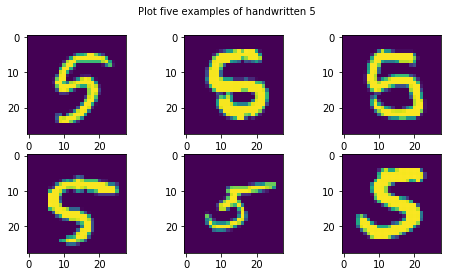

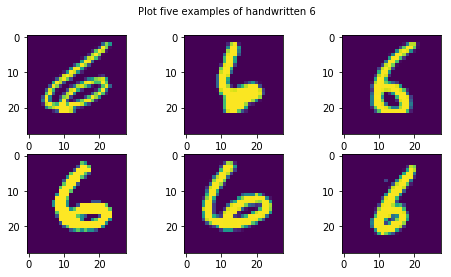

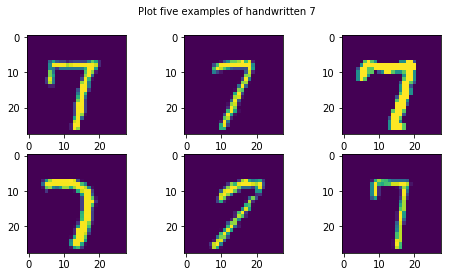

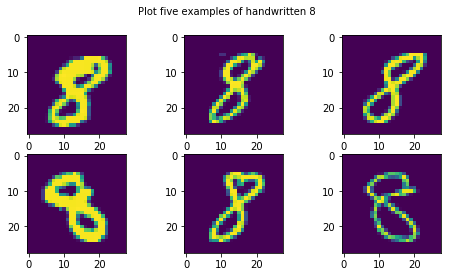

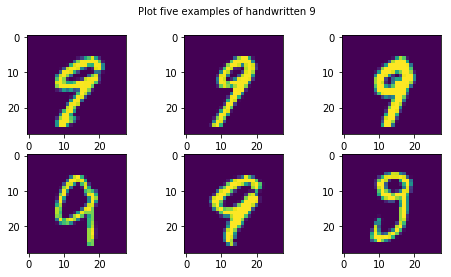

In [6]:
# plot 6 instances for each digit
for digit in range(10):
    plt.figure(figsize=(8, 4))
    for i, ind in enumerate(np.where(train_y==digit)[0][:6]):
        plt.subplot(2,3,i+1)
        plt.imshow(train_X[ind].reshape(28,28))
    plt.suptitle('Plot five examples of handwritten {}'.format(digit), fontsize = 10)
    plt.show() 

(c)

1.What is your target variable (what are you trying to predict) and what predictors do you have available? 

My goal is to correctly identify digits from a dataset of tens of thousands of handwritten images, i.e., I want to predict what digit does the picture exactly shows. The predictor I have are pictures each with 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

2.Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)?

I answered before that it is clean and balanced. We can do normalization that turns 0-255 pixel-value to 0-1, which may give faster speed in processing, but I didn't do that this time because most of the processing part is not that timie consuming (but I should do that as a better habit). 

(d)

What supervised learning technique will you use and why?

I used KNN at first because knn is a good fit for multi-class classification and is also a good tool for image classification problems.

Then I improved my model using the random forest because KNN is super slow when doing predictions, especially when we have really large dataset in this case. Random forest is way more faster than KNN.

In [7]:
# fit knn at first
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(train_X, train_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
# e, f, g: cross validation and evaluation and plot
# Cross validation function
def cross_validation_q3(training_fold, X, y, model):
    #calculate the K folds' models
    labels, yHats = [], []
    skf = StratifiedKFold(n_splits=training_fold)
    for train_index, test_index in skf.split(X, y):
        print(train_index, test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # get costs and append
        model.fit(X_train, y_train)
        labels.extend(y_test)
        yHats.extend(model.predict(X_test))
        
    return labels, yHats

In [9]:
# Function to plot confusion matrix
def plot_confusion_matrix_q3(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

(f)

I used cross validation, because I have not so great amount of data. Splitting it into training and test set might leave me with a very small test set. Testing anything on a very small test set can’t give me good testing result.
And when I use cross-validation in this case, I build K different models, so we are able to make predictions on all of my data.

[13708 13711 13712 ... 41997 41998 41999] [    0     1     2 ... 14390 14403 14411]
[    0     1     2 ... 41997 41998 41999] [13708 13711 13712 ... 28342 28343 28346]
[    0     1     2 ... 28342 28343 28346] [27472 27475 27479 ... 41997 41998 41999]


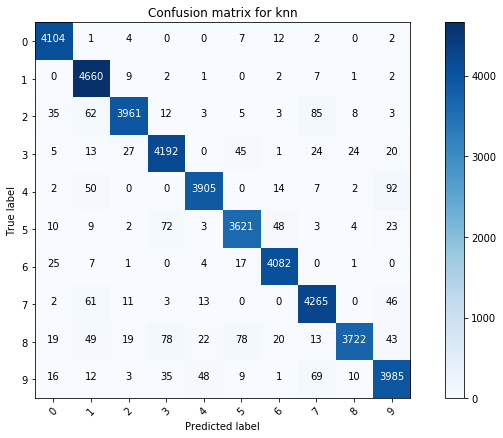

In [13]:
# plot the confusion matrix for knn
training_fold = 3
labels_knn, yHats_knn = cross_validation_q3(training_fold, train_X, train_y, knn)
confusion_mtx_knn = confusion_matrix(labels_knn, yHats_knn) 
plt.figure(figsize=(10, 6))
plot_confusion_matrix_q3(confusion_mtx_knn, classes = range(10), 
                         title='Confusion matrix for knn')
plt.show()

h:

I used confusion matrix to evaluate the performance of the KNN model because it's a multi-class data. The performance of the KNN model seems to be great, because we can observed from the confusion matrix that more than 95% digits are correctly classified.

However, KNN makes a lot of mistakes when classifying "4" with "9", "7" with "9", "3" with "9", "3" with "2". Appearantly it is because those pairs have similar part that is hard for KNN to classify. In addition, the predicting time of the KNN is so long, especially when we're doing multi-fold cross validation, so we're trying to use Random Forest to try to improve both problems.

In [10]:
# Random Forest Classifier
def random_forest_classifier(train_x, train_y):
    #RandomForest
    model = RandomForestClassifier(n_estimators=400, n_jobs=4, verbose=1)
    model.fit(train_x, train_y)
    return model

In [11]:
rf = random_forest_classifier(train_X, train_y)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   26.2s finished


Random Forest model is way more faster than the KNN model. We then need to look the performance of Random forest to see if there is an improvement.

[ 7997  7998  8006 ... 41997 41998 41999] [   0    1    2 ... 8654 8657 8660]


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   20.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.4s finished


[    0     1     2 ... 41997 41998 41999] [ 7997  7998  8006 ... 17240 17250 17252]


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   19.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.4s finished


[    0     1     2 ... 41997 41998 41999] [16468 16482 16494 ... 25538 25554 25570]


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   20.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.4s finished


[    0     1     2 ... 41997 41998 41999] [24881 24892 24897 ... 33887 33889 33890]


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   21.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.5s finished


[    0     1     2 ... 33887 33889 33890] [33226 33237 33244 ... 41997 41998 41999]


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   20.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.4s finished


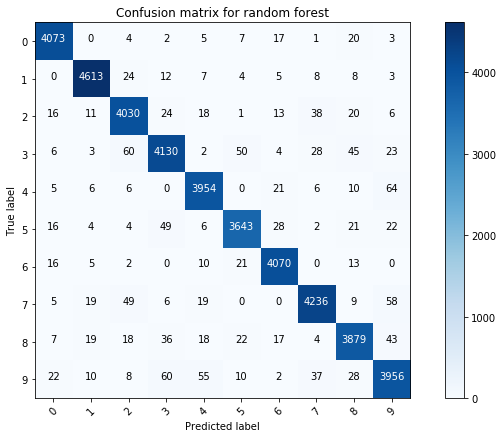

In [12]:
# plot the confusion matrix for random forest
training_fold = 5
labels_rf, yHats_rf = cross_validation_q3(training_fold, train_X, train_y, rf)
confusion_mtx_rf = confusion_matrix(labels_rf, yHats_rf) 
plt.figure(figsize=(10, 6))
plot_confusion_matrix_q3(confusion_mtx_rf, classes = range(10), 
                         title='Confusion matrix for random forest')
plt.show()

Althought the predicting speed is improved significantly, the model still appears to have the same predicting accuracy as KNN. It does well in some digits like "0", "1", "6" but not so good at some other digits, but it performs good considering the size of the validation set.

(i)

Takeovers:

1. KNN algorithm is extremely slow when predicting, especially with large dataset, but it can also be accurate. Random Forest can help extremely reduce the time spent in predicting, from several hour to a minute.
2. "0", "1", "6" are the easiest classified digit for this two algorithms, also may be the easiest for other computer vision algorithms because some part of the digit could be easily distinguished.
3. We can find from our performance evaluation plot that digits with similar parts are very hard to classified, e.g., "4" and "9", "7" and "9", "3" and "9", "3" and "2". We may need to focus more on these similar part so that we can further improve the performance of our model.
4. This two models still perform not so good on classifying digits. A more advance computer vision algorithm like CNN might help better classify them.